In [9]:
import librosa
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  
%matplotlib inline
from sklearn.svm import SVC  
import warnings
warnings.filterwarnings('ignore')

In [10]:
x , sr = librosa.load("wavfiles/00353774.wav")
print(type(x), type(sr))
print(x)

<class 'numpy.ndarray'> <class 'int'>
[-3.8226531e-03 -5.3708917e-03 -4.4372473e-03 ... -9.3773224e-06
  1.2247583e-05 -3.6367885e-05]


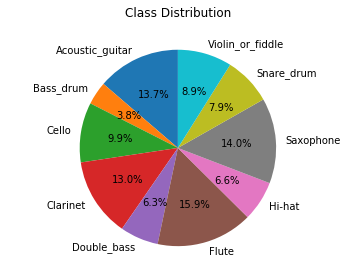

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24


In [11]:
df = pd.read_csv('instruments.csv')
df.set_index('fname', inplace=True)

for f in df.index:
    rate, signal = wavfile.read('wavfiles/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

#print(class_dist)
#print(df)
#print(signal,rate)
df.head()

In [12]:
X = df.length
y = df.label
print(type(x))
print(type(y))
#B = np.reshape(y, (-1, 1))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [14]:
svclassifier = SVC(kernel='rbf',gamma='auto') 
X_train = np.array(X_train)
print(type(X_train))
print(X_train.shape)
print(type(y_train))
print(y_train.shape)

X_train = np.reshape(X_train, (-1, 1))
#y_train = np.reshape(y_train, (-1, 1))
svclassifier.fit(X_train, y_train)  

<class 'numpy.ndarray'>
(240,)
<class 'pandas.core.series.Series'>
(240,)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
type(X_test)
X_test = np.array(X_test)

X_test = np.reshape(X_test, (-1, 1))
X_test.shape
y_pred = svclassifier.predict(X_test)  


In [16]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1 0 0 1 0 2 3 1 0 0]
 [0 2 1 0 0 0 0 0 0 0]
 [0 1 2 2 0 0 1 0 0 0]
 [0 0 4 0 0 0 3 0 0 1]
 [0 3 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 3 2 1 0 0]
 [0 1 0 0 0 0 3 0 0 0]
 [0 0 1 1 0 2 0 0 0 0]
 [0 3 1 1 0 0 1 0 0 0]
 [0 6 1 1 0 0 1 0 0 0]]
                  precision    recall  f1-score   support

 Acoustic_guitar       1.00      0.12      0.22         8
       Bass_drum       0.12      0.67      0.21         3
           Cello       0.18      0.33      0.24         6
        Clarinet       0.00      0.00      0.00         8
     Double_bass       0.00      0.00      0.00         4
           Flute       0.43      0.38      0.40         8
          Hi-hat       0.20      0.75      0.32         4
       Saxophone       0.00      0.00      0.00         4
      Snare_drum       0.00      0.00      0.00         6
Violin_or_fiddle       0.00      0.00      0.00         9

       micro avg       0.18      0.18      0.18        60
       macro avg       0.19      0.23      0.14        60
    weighted 